#**Task 1: Predication using Supervised ML**
- #### **Simple linear regression** to predict the percentage of a student based on the number of study hours.

## **Importing the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



---


## **Reading the Dataset**

In [ ]:
# Reading the dataset from the URL into Pandas DataFrame
url = "http://bit.ly/w-data"
data = pd.read_csv(url)



---


## **Exploring the Dataset**

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000




---


## **Data Visualization**

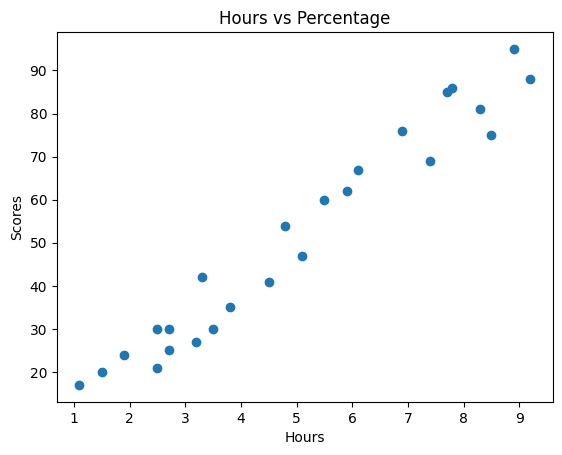

In [ ]:
# Scatter plot
plt.scatter(data['Hours'], data['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

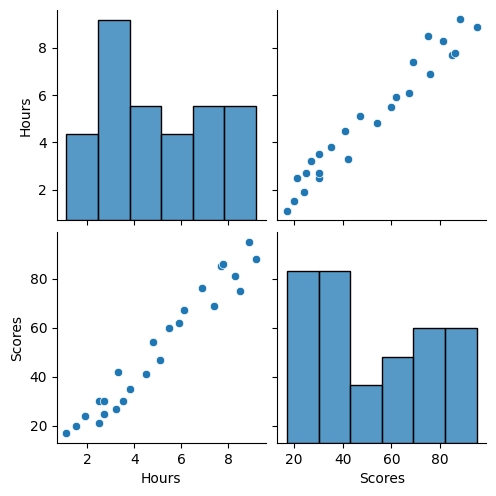

In [ ]:
# Pairplot
sns.pairplot(data)
plt.show()

∴ The visualizations above show a positive linear relation between **Score** and **Hours**.

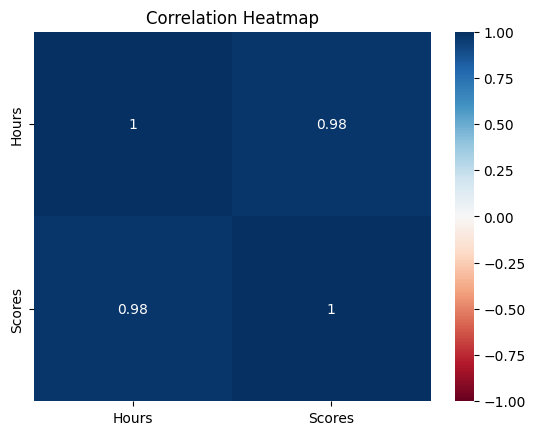

In [ ]:
# Correlation Heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


∴ The correlation matrix reveals a **strong positive** linear relationship between 'Score' and 'Hours', with a correlation coefficient of **0.98**.



---


## **Linear Regression Model**

In [ ]:
# Splitting dataset into feature and target
X = data['Hours'].values.reshape(-1,1)
y = data['Scores']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Training the Model
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = LR.predict(X_test)

#### **Compare Actual vs Predicted**

In [ ]:
# Printing actual and predicted values
print("Actual\t\tPredicted\n")
for actual, predicted in zip(y_test, y_pred):
    print(f"{actual}\t\t{predicted}")

Actual		Predicted

20		16.884144762398023
27		33.732260779489835
69		75.35701799818725
30		26.79480124304026
62		60.491033277223885


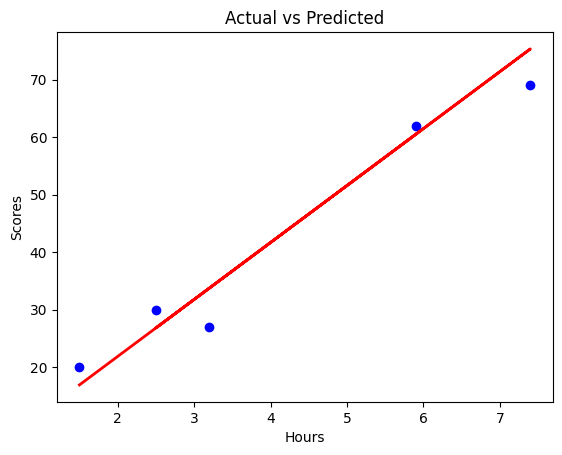

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()



---


## **Evaluating the model**

In [ ]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

print("R-squared (R2 Score):", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 21.598769307217456
Mean Absolute Error (MAE): 4.183859899002982
R-squared (R2 Score): 0.9454906892105354




>

---









> ### **What will be the predicted score if a student studies for 9.25 hrs/day?**













In [ ]:
hours = np.array([[9.25]])
predicted_score = LR.predict(hours)
print("Predicted Score for 9.25 hrs/day:", predicted_score[0])

Predicted Score for 9.25 hrs/day: 93.69173248737539
